In [10]:
#Winning Factor 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ML
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

print('Import Done')


Import Done


In [2]:
df = pd.read_csv(r"C:\Development\workspace\SideQuests\Repo\McLaren_Performance_Analysis_Team14\EDA\McLaren_Feature_Table.csv", sep=';')
print("Feature_Table:", df.columns.tolist())

Feature_Table: ['CONSTRUCTOR_NAME', 'DRIVER_NAME', 'DRIVER_NATIONALITY', 'ROUND', 'SEASON', 'CIRCUIT_NAME', 'LOCATION', 'COUNTRY', 'GRID', 'POSITION', 'STATUS', 'POINTS', 'LAPS', 'TIME', 'TIME_IN_MILLISECONDS', 'Q1_IN_MILLISECONDS', 'Q2_IN_MILLISECONDS', 'Q3_IN_MILLISECONDS', 'PIT_COUNT', 'AVG_PIT_DURATION', 'TOTAL_PIT_TIME']


In [3]:
numeric_df = df.select_dtypes(include='number')

numeric_df

,ROUND,SEASON,GRID,POSITION,POINTS,LAPS,TIME_IN_MILLISECONDS,Q1_IN_MILLISECONDS,Q2_IN_MILLISECONDS,Q3_IN_MILLISECONDS,PIT_COUNT,AVG_PIT_DURATION,TOTAL_PIT_TIME
0,1,2011,2,2,18.0,58,5392556,1884000.0,2035000.0,1747000.0,2,23.2130,46.426
1,1,2011,4,6,8.0,58,5424563,2386000.0,2397000.0,2219000.0,3,20.9503,62.851
2,2,2011,4,2,18.0,56,5863093,2253000.0,2669000.0,2300000.0,3,22.4513,67.354
3,2,2011,2,8,4.0,56,5929789,3021000.0,2952000.0,3014000.0,4,23.2527,93.011
4,3,2011,3,1,25.0,56,5818226,2251000.0,2526000.0,2503000.0,3,20.6593,61.978
...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,22,2024,8,7,6.0,50,4977334,2430000.0,2004000.0,2013000.0,2,24.4070,48.814
323,23,2024,4,3,15.0,57,5472142,2081000.0,1381000.0,2029000.0,3,26.6703,80.011
324,23,2024,3,10,2.0,57,5501085,1838000.0,2183000.0,1972000.0,4,29.6077,118.431
325,24,2024,1,1,25.0,58,5193291,2062000.0,1478000.0,1915000.0,1,21.2760,21.276


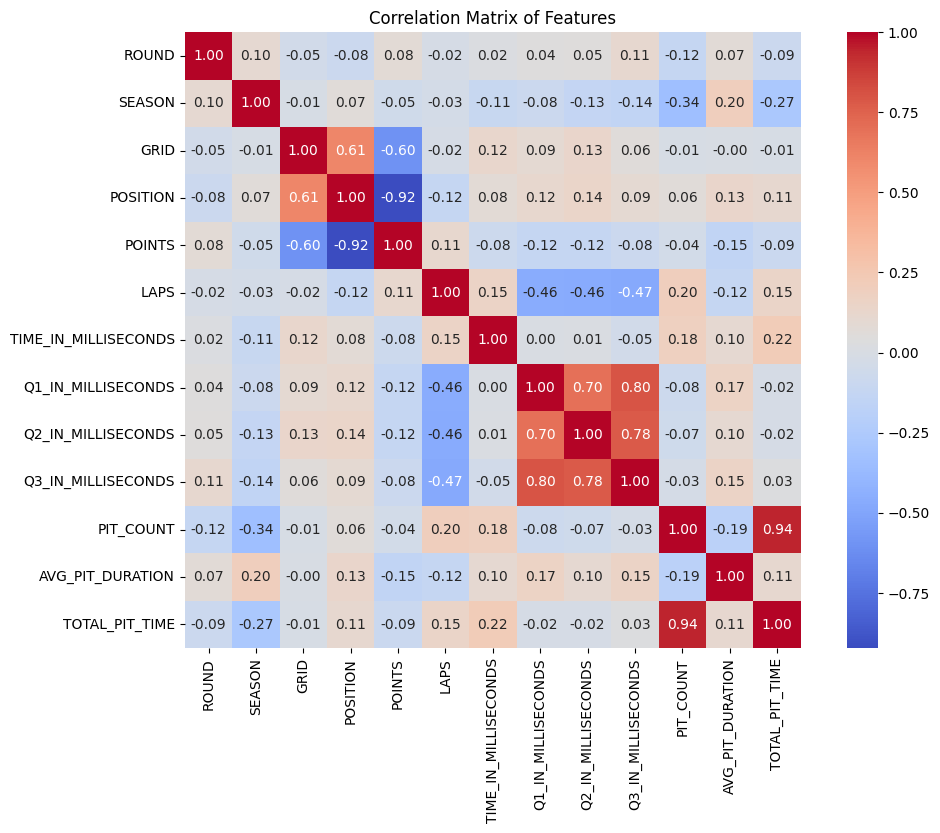

In [4]:
#Correlation matrix
corr = numeric_df.corr()

#Plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Features")
plt.show()


In [ ]:
y = df['POSITION'].apply(lambda x: 1 if x == 1 else 0)  #1 meaning the driver won

features = [
    'GRID',
    'TOTAL_PIT_TIME',
    'AVG_PIT_DURATION',
    'TIME_IN_MILLISECONDS'
]

X = df[features]

#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)


In [6]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
log = LogisticRegression(max_iter=1000)
svc = SVC(probability=True)


In [ ]:
ensemble = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('gb', gb),
        ('log', log),
        ('svc', svc)
    ],
    voting='soft'  
)

ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)


In [ ]:
print("Voting Ensemble Model Performance:\n")
print(classification_report(y_test, y_pred))


Voting Ensemble Model Performance:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        93
           1       0.50      0.17      0.25         6

    accuracy                           0.94        99
   macro avg       0.72      0.58      0.61        99
weighted avg       0.92      0.94      0.92        99



In [12]:
for name, model in [('Random Forest', rf), ('Gradient Boosting', gb), ('Logistic Regression', log), ('SVC', svc)]:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n{name}:\n")
    print(classification_report(y_test, preds))



Random Forest:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        93
           1       0.50      0.33      0.40         6

    accuracy                           0.94        99
   macro avg       0.73      0.66      0.68        99
weighted avg       0.93      0.94      0.93        99


Gradient Boosting:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        93
           1       0.50      0.33      0.40         6

    accuracy                           0.94        99
   macro avg       0.73      0.66      0.68        99
weighted avg       0.93      0.94      0.93        99


Logistic Regression:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        93
           1       0.00      0.00      0.00         6

    accuracy                           0.94        99
   macro avg       0.47      0.50      0.48        99
weighted avg 

c:\Development\workspace\SideQuests\Repo\McLaren_Performance_Analysis_Team14\datathon\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Development\workspace\SideQuests\Repo\McLaren_Performance_Analysis_Team14\datathon\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Development\workspace\SideQuests\Repo\McLaren_Performance_Analysis_Team14\datathon\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with 